# Lead Scoring Case Study

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
import warnings

In [242]:
warnings.filterwarnings('ignore')

## Understanding Data

In [243]:
# importing data
leads = pd.read_csv(r'C:\Users\ASUS\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [244]:
leads.shape

(9240, 37)

In [245]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [246]:
leads.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,1,6,7,3,3,NaN,NaN,1,2,16
top,e9be13f1-3342-4dff-b37f-bf41f6759458,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


## Cleaning Data

In [247]:
round(leads.isnull().sum()/leads.shape[0],2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.16
How did you hear about X Education               0.24
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

In [248]:
null_values = round(leads.isnull().sum()/leads.shape[0],2)

In [249]:
to_drop = null_values[null_values >0.45]

In [250]:
leads = leads.drop(to_drop.index,axis=1)

In [251]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [252]:
#Droping Prospect ID and Lead Number as these columns have no significance in our analysis
leads_id = leads[['Lead Number']]
leads.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [253]:
#Droping City and Country since they are not of any use in our analysis
leads = leads.drop(['Country','City'],axis=1)

In [254]:
# Looking for columns with 'Select' as value
for column in leads:
    print(leads[column].astype('category').value_counts())
    print('___________________________________________________')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
___________________________________________________
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
WeLearn                 1
blog                    1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64
___________________________________________________
No     8506
Yes     734
Name: Do Not Email, dtype: int64
___________________________________________________
No     9238
Yes  

Following three columns have 'Select' as one of the categories, which can be considered as missing values.

1. Specialization
2. How did you hear about X Education
3. Lead Profile

In [255]:
# Looking at the value_counts of all these columns
leads.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [256]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [257]:
leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [258]:
# Droping Lead Profile and How did you head about X Education as the number of rows with 'Select' are large and can be considered as null
leads = leads.drop(['Lead Profile','How did you hear about X Education'],axis=1)

In [259]:
#From printing value_counts of all columns we saw that below mentioned columns have 'No' in almost all rows causing data imbalance. 
#Removing these columns too.
imbalance = ['Do Not Email','Do Not Call','Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']

In [260]:
leads = leads.drop(imbalance,axis=1)

In [261]:
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Tags                                             3353
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

In [262]:
sample = leads[leads['What matters most to you in choosing a course'].isnull()]
sample['Converted'].value_counts()

0    2339
1     370
Name: Converted, dtype: int64

As the conversion ratio for data points with null under this column is very low (13%), we can drop these rows

In [263]:
leads = leads[~leads['What matters most to you in choosing a course'].isnull()]

In [264]:
leads.isnull().sum()

Lead Origin                                        0
Lead Source                                       36
Converted                                          0
TotalVisits                                      130
Total Time Spent on Website                        0
Page Views Per Visit                             130
Last Activity                                    103
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Tags                                             725
A free copy of Mastering The Interview             0
Last Notable Activity                              0
dtype: int64

In [265]:
leads.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           481
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Not doing further education                           145
Lost to EINS                                          126
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [266]:
#Converting Null values in Tags to a separate category named 'Unknown'
leads.Tags.fillna('Unknown',inplace=True)

In [267]:
leads.isnull().sum()

Lead Origin                                        0
Lead Source                                       36
Converted                                          0
TotalVisits                                      130
Total Time Spent on Website                        0
Page Views Per Visit                             130
Last Activity                                    103
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Tags                                               0
A free copy of Mastering The Interview             0
Last Notable Activity                              0
dtype: int64

In [268]:
# Dropping rows with null values in TotalVisits since only 130 values are null
leads = leads[~leads.TotalVisits.isnull()]

In [269]:
leads.isnull().sum()

Lead Origin                                       0
Lead Source                                      29
Converted                                         0
TotalVisits                                       0
Total Time Spent on Website                       0
Page Views Per Visit                              0
Last Activity                                     0
Specialization                                    0
What is your current occupation                   0
What matters most to you in choosing a course     0
Tags                                              0
A free copy of Mastering The Interview            0
Last Notable Activity                             0
dtype: int64

In [270]:
# Dropping rows with null values in Lead Source since only 29 values are null
leads = leads[~leads['Lead Source'].isnull()]

In [271]:
leads.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Tags                                             0
A free copy of Mastering The Interview           0
Last Notable Activity                            0
dtype: int64

In [272]:
#Percentage of Rows remaining
(leads.shape[0]/9240)*100

68.96103896103895

## Exploratory Data Analysis

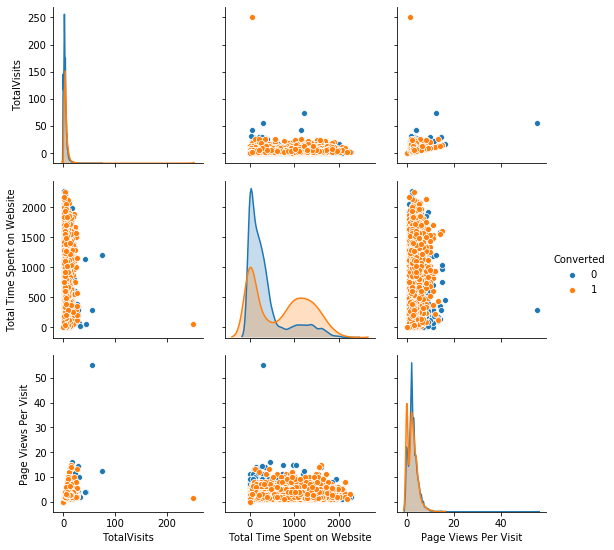

In [33]:
#Pair plots for all numeric variables
sns.pairplot(leads,hue='Converted',diag_kind='kde')

In [34]:
leads.skew()

Converted                       0.076030
TotalVisits                    22.460170
Total Time Spent on Website     0.796431
Page Views Per Visit            3.323551
dtype: float64

As we see here, Page Views Per Visit and TotalVisits are highly right skewed. Thereforw, we will apply PowerTransformation.

In [35]:
numerical = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
pt = PowerTransformer()
transformed = pd.DataFrame(pt.fit_transform(numerical))
transformed.columns = numerical.columns
transformed.index = numerical.index
transformed.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,-1.537793,-1.532421,-1.534678
1,0.691551,0.641809,0.231122
2,-0.222840,1.262382,-0.018771
3,-0.726569,0.153643,-0.629737
4,-0.222840,1.204052,-0.629737


In [36]:
transformed['Converted'] = leads.Converted
#numerical['Converted'] = leads.Converted

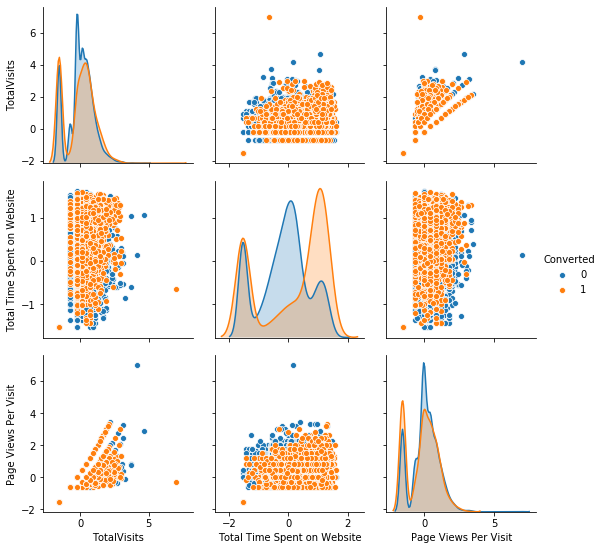

In [37]:
#Pairplot after PowerTransformation
sns.pairplot(transformed,hue='Converted',diag_kind='kde')

In [38]:
transformed.skew()

TotalVisits                   -0.004138
Total Time Spent on Website   -0.338492
Page Views Per Visit          -0.021681
Converted                      0.076030
dtype: float64

In [39]:
leads.groupby('Tags')['Converted'].mean()

Tags
Already a student                                    0.006452
Busy                                                 0.567568
Closed by Horizzon                                   0.993355
Diploma holder (Not Eligible)                        0.015873
Graduation in progress                               0.063063
In confusion whether part time or DLP                0.200000
Interested  in full time MBA                         0.025862
Interested in Next batch                             1.000000
Interested in other courses                          0.027254
Lateral student                                      1.000000
Lost to EINS                                         0.967480
Lost to Others                                       0.000000
Not doing further education                          0.006897
Recognition issue (DEC approval)                     0.000000
Ringing                                              0.028644
Shall take in the next coming month                  0.500000
Sti

## Dummy Variables Creation

In [40]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    6372 non-null   object 
 1   Lead Source                                    6372 non-null   object 
 2   Converted                                      6372 non-null   int64  
 3   TotalVisits                                    6372 non-null   float64
 4   Total Time Spent on Website                    6372 non-null   int64  
 5   Page Views Per Visit                           6372 non-null   float64
 6   Last Activity                                  6372 non-null   object 
 7   Specialization                                 6372 non-null   object 
 8   What is your current occupation                6372 non-null   object 
 9   What matters most to you in choosing a course  6372 

In [41]:
cat_cols = leads.loc[:,leads.dtypes=='object']
cat_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    6372 non-null   object
 1   Lead Source                                    6372 non-null   object
 2   Last Activity                                  6372 non-null   object
 3   Specialization                                 6372 non-null   object
 4   What is your current occupation                6372 non-null   object
 5   What matters most to you in choosing a course  6372 non-null   object
 6   Tags                                           6372 non-null   object
 7   A free copy of Mastering The Interview         6372 non-null   object
 8   Last Notable Activity                          6372 non-null   object
dtypes: object(9)
memory usage: 817.8+ KB


In [42]:
cat_cols.Specialization.value_counts()

Select                               1838
Finance Management                    745
Human Resource Management             665
Marketing Management                  663
Operations Management                 391
Business Administration               310
IT Projects Management                278
Supply Chain Management               275
Banking, Investment And Insurance     266
Media and Advertising                 161
Travel and Tourism                    149
International Business                136
Healthcare Management                 122
Hospitality Management                 90
E-COMMERCE                             80
Retail Management                      78
Rural and Agribusiness                 57
E-Business                             43
Services Excellence                    25
Name: Specialization, dtype: int64

In [43]:
spec = cat_cols.pop('Specialization')
tags = cat_cols.pop('Tags')

In [44]:
dummy_transformed = pd.get_dummies(cat_cols,drop_first=True)
dummy_transformed.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [45]:
spec_dummy = pd.get_dummies(spec,prefix='Specialization')
tags_dummy = pd.get_dummies(tags,prefix='Tags')
spec_dummy.drop(['Specialization_Select'],axis=1,inplace=True)
tags_dummy.drop(['Tags_Unknown'],axis=1,inplace=True)
dummy_transformed = pd.concat([dummy_transformed,spec_dummy,tags_dummy],axis=1)

In [46]:
dummy_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 0 to 9239
Data columns (total 98 columns):
 #   Column                                                                   Non-Null Count  Dtype
---  ------                                                                   --------------  -----
 0   Lead Origin_Landing Page Submission                                      6372 non-null   uint8
 1   Lead Origin_Lead Add Form                                                6372 non-null   uint8
 2   Lead Origin_Lead Import                                                  6372 non-null   uint8
 3   Lead Source_Direct Traffic                                               6372 non-null   uint8
 4   Lead Source_Facebook                                                     6372 non-null   uint8
 5   Lead Source_Google                                                       6372 non-null   uint8
 6   Lead Source_Live Chat                                                    6372 non-null  

In [172]:
#Merging PowerTranformed and dummy_transformed dataframes
leads_tranf = pd.concat([transformed,dummy_transformed],axis=1)
leads_tranf.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,-1.537793,-1.532421,-1.534678,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.691551,0.641809,0.231122,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.222840,1.262382,-0.018771,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,-0.726569,0.153643,-0.629737,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.222840,1.204052,-0.629737,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


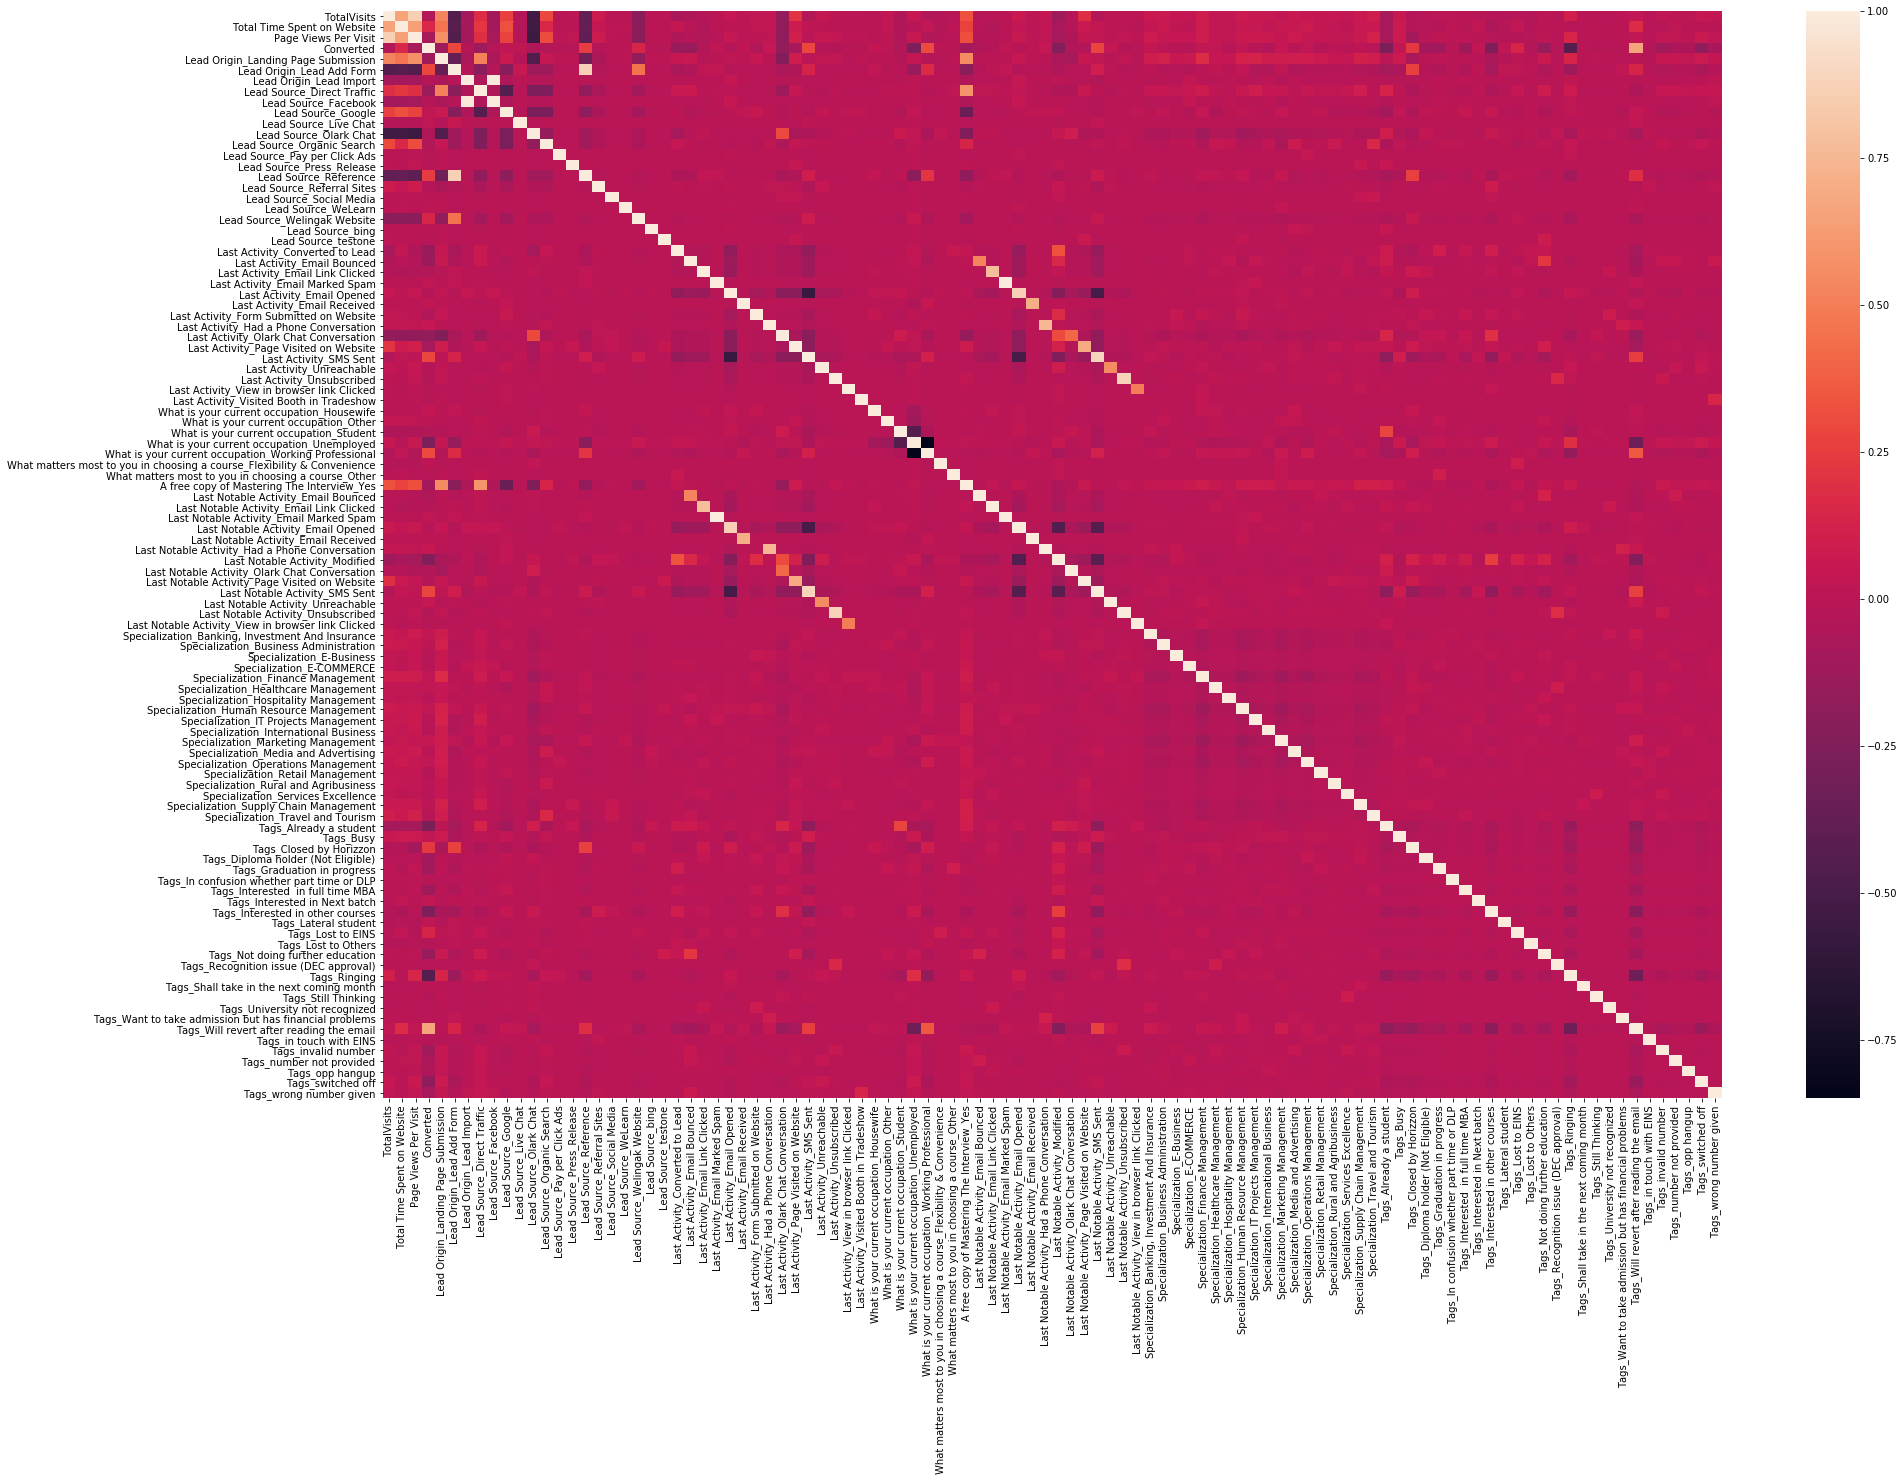

In [173]:
#Plotting correlations
plt.figure(figsize = (30,20))
sns.heatmap(leads_tranf.corr())

### Train Test Split

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
y = leads_tranf.pop('Converted')
X = leads_tranf
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [176]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,-1.537793,-1.532421,-1.534678,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.691551,0.641809,0.231122,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.222840,1.262382,-0.018771,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,-0.726569,0.153643,-0.629737,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.222840,1.204052,-0.629737,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [177]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X,y,train_size = 0.7, test_size=0.3, random_state=100)

In [178]:
X_Train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
4170,0.444301,0.869072,0.849633,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6812,2.202050,1.081016,-0.018771,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7717,-1.537793,-1.532421,-1.534678,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207,0.691551,0.244502,1.188898,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2044,-0.222840,0.265240,-0.018771,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Scaling

In [179]:
from sklearn.preprocessing import MinMaxScaler

In [180]:
scaler = MinMaxScaler()
X_Train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_Train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_Train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
4170,0.231871,0.764384,0.476261,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6812,0.437497,0.831844,0.302799,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7717,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207,0.260795,0.565586,0.544028,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2044,0.153827,0.572187,0.302799,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Model Building

In [181]:
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression()

In [182]:
# Import RFE and select 20 variables
from sklearn.feature_selection import RFE
rfe = RFE(logisticRegression, 15)
rfe = rfe.fit(X_Train, y_Train)

In [183]:
#Selected features are:
list(zip(X_Train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 9),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 7),
 ('Lead Origin_Landing Page Submission', False, 58),
 ('Lead Origin_Lead Add Form', False, 2),
 ('Lead Origin_Lead Import', False, 61),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 29),
 ('Lead Source_Google', False, 31),
 ('Lead Source_Live Chat', False, 81),
 ('Lead Source_Olark Chat', False, 4),
 ('Lead Source_Organic Search', False, 30),
 ('Lead Source_Pay per Click Ads', False, 80),
 ('Lead Source_Press_Release', False, 85),
 ('Lead Source_Reference', False, 69),
 ('Lead Source_Referral Sites', False, 53),
 ('Lead Source_Social Media', False, 83),
 ('Lead Source_WeLearn', False, 84),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 73),
 ('Lead Source_testone', False, 68),
 ('Last Activity_Converted to Lead', False, 42),
 ('Last Activity_Email Bounced', False, 8),
 ('Last Activity_Email Link Clicked', False, 22),
 ('La

In [184]:
cols = X_Train.columns[rfe.support_]
cols

Index(['Lead Source_Welingak Website', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Graduation in progress', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given'],
      dtype='object')

In [185]:
X_Train = X_Train[cols]

In [186]:
import statsmodels.api as sm

In [187]:
#Building LogisticRegression model on selected columns using statsmodel
X_train_sm = sm.add_constant(X_Train)
logm = sm.GLM(y_Train, X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4444
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -846.20
Date:                Sun, 22 Nov 2020   Deviance:                       1692.4
Time:                        17:40:11   Pearson chi2:                 4.35e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.4636      0.083      5.616      0.000       0.302       0.625
Lead Source_Welingak Website                 3.8355      1.010      3.797      0.000       1.856       5.815
Tags_Already a student                      -5.1144      0.586     -8.728      0.000      -6.263      -3.966
Tags_Closed by Horizzon                      4.1069      0.716      5.740      0.000       2.705       5.509
Tags_Diploma holder (Not Eligible)         -25.0297   1.98e+04     -0.001      0.999   -3.87e+04    3.87e+04
Tags_Graduation in progress                 -3.1447      0.470     -6.697      0.000      -4.065      -2.224
Tags_Interested  in full time MBA           -3.7839      0.593     -6.376      0.000      -4.947      -2.621
Tags_Interested in other courses            -3.9510      0.331    -11.920      0.000      -4.601      -3.301
Tags_Lost to EINS                            3.2505      0.720      4.512      0.000       1.838       4.662
Tags_Not doing further education            -5.1910      1.008     -5.151      0.000      -7.166      -3.216
Tags_Ringing                                -4.0202      0.227    -17.709      0.000      -4.465      -3.575
Tags_Will revert after reading the email     2.9809      0.176     16.982      0.000       2.637       3.325
Tags_invalid number                         -4.5412      1.012     -4.488      0.000      -6.524      -2.558
Tags_number not provided                   -25.0297   3.18e+04     -0.001      0.999   -6.23e+04    6.23e+04
Tags_switched off                           -5.5876      1.006     -5.552      0.000      -7.560      -3.615
Tags_wrong number given                    -25.0297   2.48e+04     -0.001      0.999   -4.86e+04    4.85e+04
============================================================================================================
"""

Checking for VIF values first

In [188]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [189]:
vif = pd.DataFrame()
vif['Features'] = X_Train.columns
vif['VIF'] = [variance_inflation_factor(X_Train.values, i) for i in range(X_Train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.01
2,Tags_Closed by Horizzon,1.00
3,Tags_Diploma holder (Not Eligible),1.00
4,Tags_Graduation in progress,1.00
5,Tags_Interested in full time MBA,1.00
7,Tags_Lost to EINS,1.00
8,Tags_Not doing further education,1.00
11,Tags_invalid number,1.00
12,Tags_number not provided,1.00
13,Tags_switched off,1.00


In [190]:
#Since VIF Values are already lesser than 5, droppping column with highest P-value
X_Train.drop(['Tags_number not provided'],axis=1,inplace=True)

In [191]:
X_train_sm = sm.add_constant(X_Train)
logm2 = sm.GLM(y_Train, X_train_sm, family = sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -862.02
Date:                Sun, 22 Nov 2020   Deviance:                       1724.0
Time:                        17:40:18   Pearson chi2:                 4.37e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.3949      0.081      4.885      0.000       0.236       0.553
Lead Source_Welingak Website                 3.9037      1.010      3.865      0.000       1.924       5.883
Tags_Already a student                      -5.0457      0.586     -8.615      0.000      -6.194      -3.898
Tags_Closed by Horizzon                      4.1756      0.715      5.837      0.000       2.774       5.578
Tags_Diploma holder (Not Eligible)         -24.9610   1.98e+04     -0.001      0.999   -3.87e+04    3.87e+04
Tags_Graduation in progress                 -3.0760      0.469     -6.554      0.000      -3.996      -2.156
Tags_Interested  in full time MBA           -3.7152      0.593     -6.263      0.000      -4.878      -2.552
Tags_Interested in other courses            -3.8823      0.331    -11.727      0.000      -4.531      -3.233
Tags_Lost to EINS                            3.3191      0.720      4.609      0.000       1.908       4.731
Tags_Not doing further education            -5.1223      1.008     -5.083      0.000      -7.097      -3.147
Tags_Ringing                                -3.9515      0.226    -17.454      0.000      -4.395      -3.508
Tags_Will revert after reading the email     3.0496      0.175     17.452      0.000       2.707       3.392
Tags_invalid number                         -4.4725      1.012     -4.421      0.000      -6.455      -2.490
Tags_switched off                           -5.5189      1.006     -5.485      0.000      -7.491      -3.547
Tags_wrong number given                    -24.9610   2.48e+04     -0.001      0.999   -4.86e+04    4.85e+04
============================================================================================================
"""

In [192]:
# Dropping column again with the hogher P-value
X_Train.drop(['Tags_wrong number given'],axis=1,inplace=True)

In [193]:
X_train_sm = sm.add_constant(X_Train)
logm3 = sm.GLM(y_Train, X_train_sm, family = sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -886.63
Date:                Sun, 22 Nov 2020   Deviance:                       1773.3
Time:                        17:40:18   Pearson chi2:                 4.40e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.2912      0.078      3.712      0.000       0.137       0.445
Lead Source_Welingak Website                 4.0067      1.010      3.968      0.000       2.028       5.986
Tags_Already a student                      -4.9419      0.585     -8.442      0.000      -6.089      -3.795
Tags_Closed by Horizzon                      4.2792      0.715      5.984      0.000       2.878       5.681
Tags_Diploma holder (Not Eligible)         -23.8572    1.2e+04     -0.002      0.998   -2.35e+04    2.35e+04
Tags_Graduation in progress                 -2.9722      0.469     -6.339      0.000      -3.891      -2.053
Tags_Interested  in full time MBA           -3.6114      0.593     -6.091      0.000      -4.773      -2.449
Tags_Interested in other courses            -3.7785      0.330    -11.434      0.000      -4.426      -3.131
Tags_Lost to EINS                            3.4229      0.720      4.754      0.000       2.012       4.834
Tags_Not doing further education            -5.0185      1.007     -4.981      0.000      -6.993      -3.044
Tags_Ringing                                -3.8477      0.226    -17.060      0.000      -4.290      -3.406
Tags_Will revert after reading the email     3.1534      0.174     18.161      0.000       2.813       3.494
Tags_invalid number                         -4.3687      1.011     -4.319      0.000      -6.351      -2.386
Tags_switched off                           -5.4151      1.006     -5.383      0.000      -7.387      -3.443
============================================================================================================
"""

In [194]:
#Calculating VIFs again
vif = pd.DataFrame()
vif['Features'] = X_Train.columns
vif['VIF'] = [variance_inflation_factor(X_Train.values, i) for i in range(X_Train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.01
2,Tags_Closed by Horizzon,1.00
3,Tags_Diploma holder (Not Eligible),1.00
4,Tags_Graduation in progress,1.00
5,Tags_Interested in full time MBA,1.00
7,Tags_Lost to EINS,1.00
8,Tags_Not doing further education,1.00
11,Tags_invalid number,1.00
12,Tags_switched off,1.00
6,Tags_Interested in other courses,0.24


In [195]:
# Dropping column again with the hogher P-value
X_Train.drop(['Tags_Diploma holder (Not Eligible)'],axis=1,inplace=True)

In [196]:
X_train_sm = sm.add_constant(X_Train)
logm4 = sm.GLM(y_Train, X_train_sm, family = sm.families.Binomial()).fit()
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -922.18
Date:                Sun, 22 Nov 2020   Deviance:                       1844.4
Time:                        17:40:21   Pearson chi2:                 4.44e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.1471      0.075      1.952      0.051      -0.001       0.295
Lead Source_Welingak Website                 4.1497      1.010      4.111      0.000       2.171       6.128
Tags_Already a student                      -4.7979      0.585     -8.202      0.000      -5.944      -3.651
Tags_Closed by Horizzon                      4.4232      0.715      6.189      0.000       3.022       5.824
Tags_Graduation in progress                 -2.8281      0.468     -6.038      0.000      -3.746      -1.910
Tags_Interested  in full time MBA           -3.4674      0.593     -5.852      0.000      -4.629      -2.306
Tags_Interested in other courses            -3.6345      0.330    -11.022      0.000      -4.281      -2.988
Tags_Lost to EINS                            3.5668      0.720      4.957      0.000       2.156       4.977
Tags_Not doing further education            -4.8745      1.007     -4.839      0.000      -6.849      -2.900
Tags_Ringing                                -3.7037      0.224    -16.498      0.000      -4.144      -3.264
Tags_Will revert after reading the email     3.2974      0.172     19.141      0.000       2.960       3.635
Tags_invalid number                         -4.2247      1.011     -4.178      0.000      -6.207      -2.243
Tags_switched off                           -5.2711      1.006     -5.241      0.000      -7.242      -3.300
============================================================================================================
"""

In [197]:
#Checking VIF again
#Calculating VIFs again
vif = pd.DataFrame()
vif['Features'] = X_Train.columns
vif['VIF'] = [variance_inflation_factor(X_Train.values, i) for i in range(X_Train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.01
2,Tags_Closed by Horizzon,1.00
3,Tags_Graduation in progress,1.00
4,Tags_Interested in full time MBA,1.00
6,Tags_Lost to EINS,1.00
7,Tags_Not doing further education,1.00
10,Tags_invalid number,1.00
11,Tags_switched off,1.00
5,Tags_Interested in other courses,0.24
1,Tags_Already a student,0.19


## Model Evaluation

<b>Prediction on train dataset with cut off as 0.5</b>

In [198]:
y_train_pred = logm4.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.96906764, 0.53671432, 0.53671432, 0.53671432, 0.53671432,
       0.96906764, 0.00946372, 0.98657112, 0.00946372, 0.02967359])

In [199]:
y_train_pred_final = pd.DataFrame({'Converted':y_Train.values, 'Probabilities':y_train_pred})
y_train_pred_final.head()

,Converted,Probabilities
0,1,0.969068
1,1,0.536714
2,1,0.536714
3,0,0.536714
4,0,0.536714


In [200]:
y_train_pred_final['Predicted'] = y_train_pred_final.Probabilities.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.index = y_Train.index
y_train_pred_final.head()

,Converted,Probabilities,Predicted
4170,1,0.969068,1
6812,1,0.536714,1
7717,1,0.536714,1
207,0,0.536714,1
2044,0,0.536714,1


In [201]:
#Building Confusion Matrix for Train Dataset
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1943  376]
 [  47 2094]]


In [202]:
#Checking accuracy score of confusion matrix
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9051569506726458


In [203]:
TP = confusion[1,1] 
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [204]:
#Sensitivity
TP/(TP+FN)

0.9780476412891173

In [205]:
#specificity
TN/(TN+FP)

0.8378611470461406

### Plotting ROC Curve

To check the tradeoff between sensitivity and specificity, and check AUC we will plot ROC curve

In [206]:
#Defining ROC curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

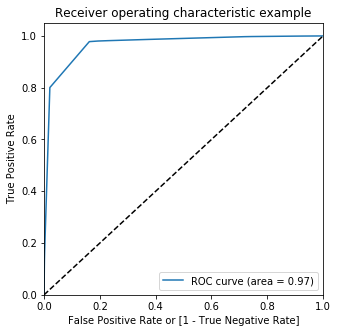

In [207]:
# Calling ROC function on train dataset
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Probabilities)

The area under the ROC curve (AUC) is 0.97 which is very close to 1, hence model predicts 1s and 0s correctly.

## Finding optimal cutoff

### Sensitivity and Specificity

In [208]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
#numbers = [float(x)/100 for x in range(50,60)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Probabilities.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(10)

,Converted,Probabilities,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4170,1,0.969068,1,1,1,1,1,1,1,1,1,1,1
6812,1,0.536714,1,1,1,1,1,1,1,0,0,0,0
7717,1,0.536714,1,1,1,1,1,1,1,0,0,0,0
207,0,0.536714,1,1,1,1,1,1,1,0,0,0,0
2044,0,0.536714,1,1,1,1,1,1,1,0,0,0,0
3330,1,0.969068,1,1,1,1,1,1,1,1,1,1,1
6498,0,0.009464,0,1,0,0,0,0,0,0,0,0,0
2085,1,0.986571,1,1,1,1,1,1,1,1,1,1,1
6260,0,0.009464,0,1,0,0,0,0,0,0,0,0,0
19,0,0.029674,0,1,0,0,0,0,0,0,0,0,0


In [209]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

#num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.480045  1.000000  0.000000
0.1   0.1  0.905157  0.978048  0.837861
0.2   0.2  0.905157  0.978048  0.837861
0.3   0.3  0.905157  0.978048  0.837861
0.4   0.4  0.905157  0.978048  0.837861
0.5   0.5  0.905157  0.978048  0.837861
0.6   0.6  0.893498  0.800560  0.979301
0.7   0.7  0.893498  0.800560  0.979301
0.8   0.8  0.893498  0.800560  0.979301
0.9   0.9  0.893498  0.800560  0.979301


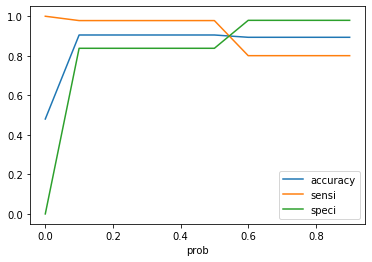

In [210]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Around <b>0.53</b> all three lines meet, therefore <b>0.53</b> is the optimal cutoff

In [211]:
y_train_pred_final['optimal_pred'] = y_train_pred_final.Probabilities.map( lambda x: 1 if x > 0.53 else 0)

y_train_pred_final.head(10)

,Converted,Probabilities,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,optimal_pred
4170,1,0.969068,1,1,1,1,1,1,1,1,1,1,1,1
6812,1,0.536714,1,1,1,1,1,1,1,0,0,0,0,1
7717,1,0.536714,1,1,1,1,1,1,1,0,0,0,0,1
207,0,0.536714,1,1,1,1,1,1,1,0,0,0,0,1
2044,0,0.536714,1,1,1,1,1,1,1,0,0,0,0,1
3330,1,0.969068,1,1,1,1,1,1,1,1,1,1,1,1
6498,0,0.009464,0,1,0,0,0,0,0,0,0,0,0,0
2085,1,0.986571,1,1,1,1,1,1,1,1,1,1,1,1
6260,0,0.009464,0,1,0,0,0,0,0,0,0,0,0,0
19,0,0.029674,0,1,0,0,0,0,0,0,0,0,0,0


In [212]:
#Checking overall accuracy with optimal cutoff on train dataset
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.optimal_pred)

0.9051569506726458

In [213]:
confusion_opt = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.optimal_pred)
confusion_opt

array([[1943,  376],
       [  47, 2094]], dtype=int64)

In [214]:
TP = confusion_opt[1,1] # true positive 
TN = confusion_opt[0,0] # true negatives
FP = confusion_opt[0,1] # false positives
FN = confusion_opt[1,0] # false negatives

In [215]:
#Sensitivity
TP / float(TP+FN)

0.9780476412891173

In [216]:
#specificity
TN / float(TN+FP)

0.8378611470461406

### Precision and Recall

In [217]:
#Precision
TP/ float(TP+FP)

0.8477732793522267

In [218]:
#Recall
TP/ float(TP+FN)

0.9780476412891173

In [219]:
#Importing library for precision_recall curve
from sklearn.metrics import precision_recall_curve

In [220]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Probabilities)

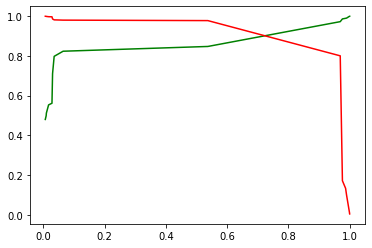

In [221]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Around <b>0.71</b> both lines meet, therefore optimal cutoff is <b>0.71</b> as per precision-recall-tradeoff curve

In [222]:
y_train_pred_final['optimal_pred_prc'] = y_train_pred_final.Probabilities.map( lambda x: 1 if x > 0.71 else 0)

y_train_pred_final.head(10)

,Converted,Probabilities,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,optimal_pred,optimal_pred_prc
4170,1,0.969068,1,1,1,1,1,1,1,1,1,1,1,1,1
6812,1,0.536714,1,1,1,1,1,1,1,0,0,0,0,1,0
7717,1,0.536714,1,1,1,1,1,1,1,0,0,0,0,1,0
207,0,0.536714,1,1,1,1,1,1,1,0,0,0,0,1,0
2044,0,0.536714,1,1,1,1,1,1,1,0,0,0,0,1,0
3330,1,0.969068,1,1,1,1,1,1,1,1,1,1,1,1,1
6498,0,0.009464,0,1,0,0,0,0,0,0,0,0,0,0,0
2085,1,0.986571,1,1,1,1,1,1,1,1,1,1,1,1,1
6260,0,0.009464,0,1,0,0,0,0,0,0,0,0,0,0,0
19,0,0.029674,0,1,0,0,0,0,0,0,0,0,0,0,0


In [223]:
#Checking overall accuracy with prc optimal cutoff on train dataset
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.optimal_pred_prc)

0.8934977578475336

In [224]:
confusion_opt_prc = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.optimal_pred_prc)
confusion_opt_prc

array([[2271,   48],
       [ 427, 1714]], dtype=int64)

In [225]:
TP = confusion_opt_prc[1,1] # true positive 
TN = confusion_opt_prc[0,0] # true negatives
FP = confusion_opt_prc[0,1] # false positives
FN = confusion_opt_prc[1,0] # false negatives

In [226]:
#Precision
TP/ float(TP+FP)

0.9727582292849035

In [227]:
#Recall
TP/ float(TP+FN)

0.8005604857543204

Since we want the model to not miss a positive lead, the Recall (Sensitivity) value should be higher, therefore cutoff that we got from sensitivity and specificity tradeoff works better. 

### Predictions on Test Dataset

In [228]:
X_Test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_Test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [229]:
cols = X_Train.columns
X_Test = X_Test[cols]
X_Test.head()

,Lead Source_Welingak Website,Tags_Already a student,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off
8402,0,0,0,0,0,0,0,0,0,1,0,0
8782,0,0,0,0,0,1,0,0,0,0,0,0
6199,0,0,0,0,0,0,0,0,0,1,0,0
6482,0,0,0,0,0,0,0,0,0,1,0,0
6026,0,0,1,0,0,0,0,0,0,0,0,0


In [230]:
X_test_sm = sm.add_constant(X_Test)

In [231]:
#Predictions on test dataset
y_test_pred = logm4.predict(X_test_sm)
y_test_pred[:10]

8402    0.969068
8782    0.029674
6199    0.969068
6482    0.969068
6026    0.989751
5991    0.969068
3812    0.009464
6307    0.029674
7344    0.536714
4171    0.969068
dtype: float64

In [232]:
y_test_pred_final = pd.DataFrame({'Converted':y_Test.values, 'Probabilities':y_test_pred.values})
y_test_pred_final.head()

,Converted,Probabilities
0,1,0.969068
1,0,0.029674
2,1,0.969068
3,1,0.969068
4,1,0.989751


In [233]:
y_test_pred_final['Predicted'] = y_test_pred_final.Probabilities.map(lambda x: 1 if x > 0.53 else 0)
y_test_pred_final.index = y_Test.index
y_test_pred_final.head()

,Converted,Probabilities,Predicted
8402,1,0.969068,1
8782,0,0.029674,0
6199,1,0.969068,1
6482,1,0.969068,1
6026,1,0.989751,1


In [234]:
y_test_pred_final.Predicted.value_counts()

1    1078
0     834
Name: Predicted, dtype: int64

In [235]:
confusion_test = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted)
print(confusion_test)

[[815 173]
 [ 19 905]]


In [236]:
print(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))

0.899581589958159


In [237]:
TP = confusion_test[1,1] 
TN = confusion_test[0,0]
FP = confusion_test[0,1]
FN = confusion_test[1,0]

In [238]:
#Sensitivity
TP / float(TP+FN)

0.9794372294372294

In [239]:
#Specificity
TN / float(TN+FP)

0.8248987854251012

<b>Our Final Model with 0.53 cut-off is 98% accurate in predicting leads correctly.</b>

In [273]:
# selecting final rows we had before model building
leads_id = leads_id.iloc[leads_tranf.index,:]

In [280]:
#Combining probabilities of train and test with assigned index
y_probabilities_combined = pd.concat([y_train_pred_final.Probabilities,y_test_pred_final.Probabilities],axis=0) 

In [281]:
# adding score to final lead_numbers, multiplying predicted probabilities by 100
leads_id['leads_score'] = y_probabilities_combined*100

In [284]:
leads_id

,Lead Number,leads_score
0,660737,2.967359
1,660728,2.774427
2,660727,96.906764
3,660719,2.774427
4,660681,96.906764
...,...,...
9234,579615,96.906764
9235,579564,96.906764
9236,579546,53.671432
9237,579545,1.666667


In [285]:
leads_id.describe()

,Lead Number,leads_score
count,6372.000000,6372.000000
mean,616229.943817,48.286906
std,23372.348262,43.540155
min,579533.000000,0.591716
25%,595772.750000,2.774427
50%,613735.000000,53.671432
75%,637156.750000,96.906764
max,660737.000000,99.983674
